In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [2]:
df = pd.read_csv("Desktop/Diwali Sales Data.csv", encoding='latin1')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.drop(["Status","unnamed1"],axis=1,inplace=True) #Dropping columns with null values

In [9]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df.dropna(inplace=True) #Dropping null values

In [12]:
df["Amount"]=df["Amount"].astype("int")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [14]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Exploratory Data Analysis 

# Gender

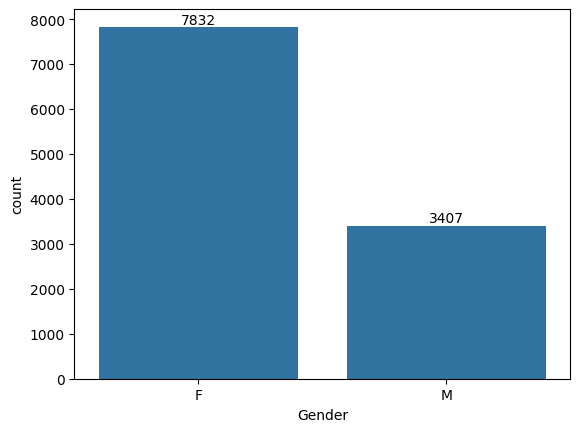

In [19]:
ax=sns.countplot(x="Gender",data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [28]:
sales_by_gender=df.groupby(["Gender"],as_index=False)["Amount"].sum()

<Axes: xlabel='Gender', ylabel='Amount'>

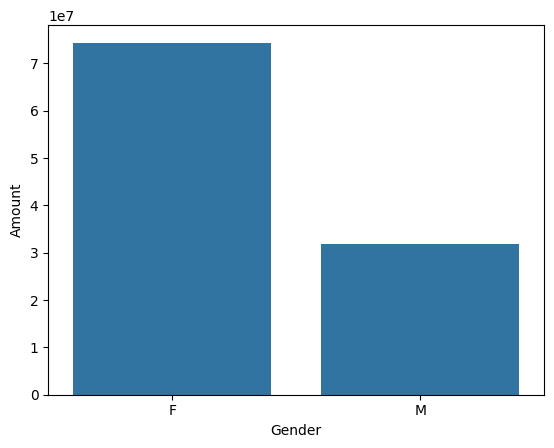

In [29]:
sns.barplot(x="Gender",y="Amount",data=sales_by_gender)

From the graph above we can conclude that most of buyers are female and even the purchasing power of females is greater than men 

# Age

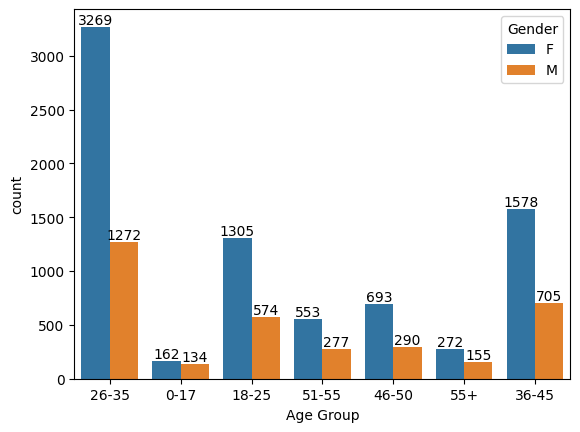

In [36]:
ax=sns.countplot(x="Age Group",data=df,hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)

In [37]:
sales_by_age=df.groupby(["Age Group"],as_index=False)["Amount"].sum()

<Axes: xlabel='Age Group', ylabel='Amount'>

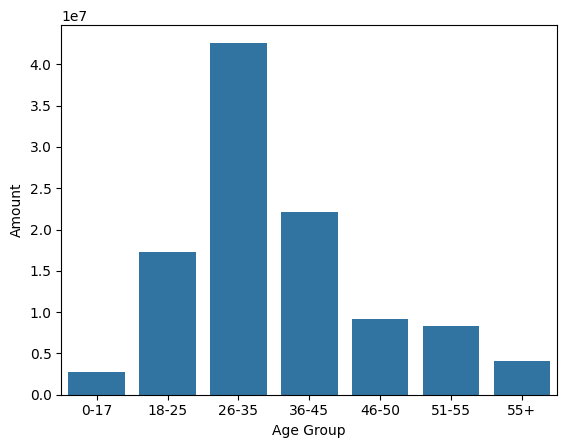

In [39]:
sns.barplot(x="Age Group",y="Amount",data=sales_by_age)

From the graph above we can conclude that majority of the buyers(female) belong to the age group of 26-35

# State

In [44]:
sales_by_states=df.groupby(["State"],as_index=False)["Orders"].sum()
sns.set(rc={"figure.figsize":(20,5)})

<Axes: xlabel='State', ylabel='Orders'>

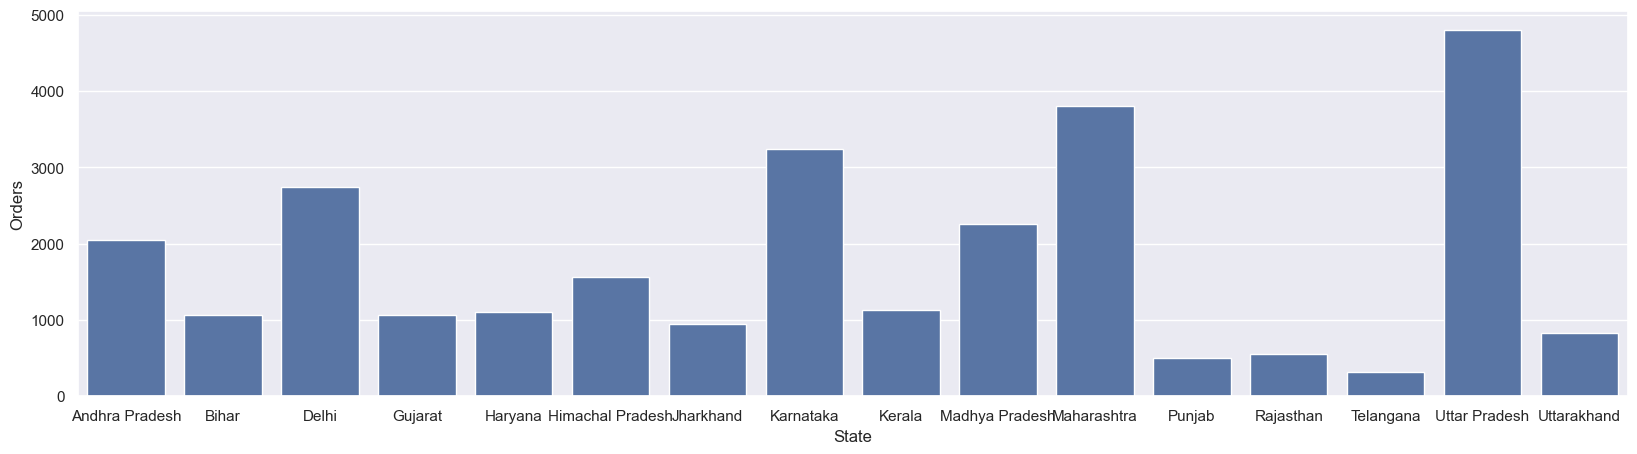

In [45]:
sns.barplot(x="State",y="Orders",data=sales_by_states)

In [46]:
sales_state=df.groupby(["State"],as_index=False)['Amount'].sum()

<Axes: xlabel='State', ylabel='Amount'>

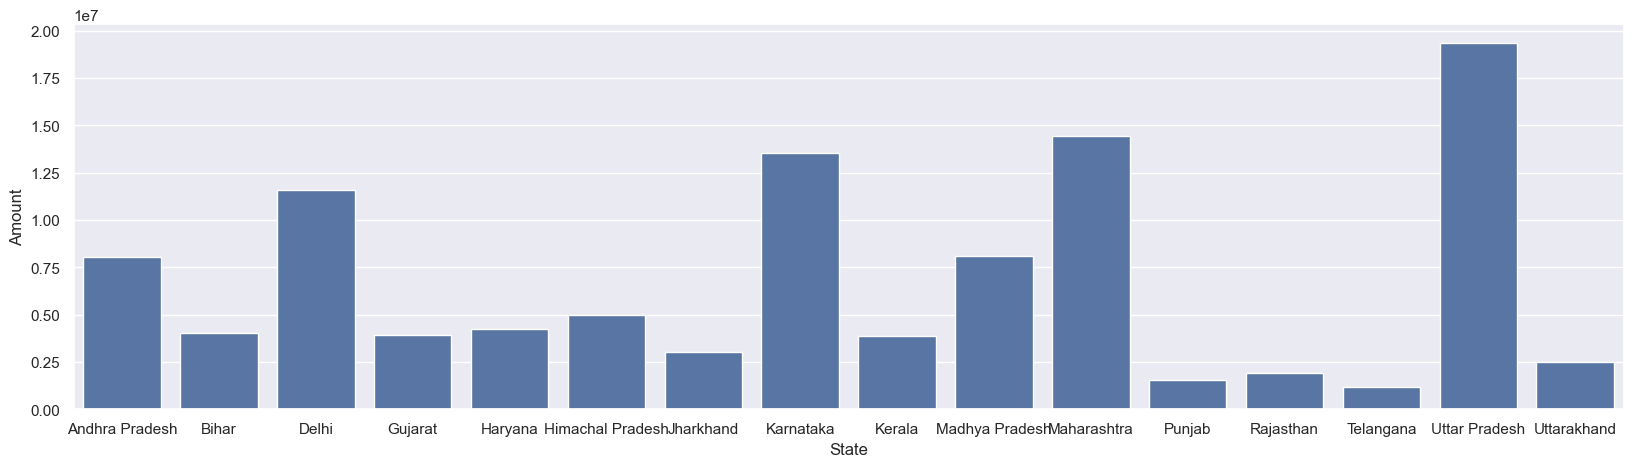

In [47]:
sns.barplot(x="State",y="Amount",data=sales_state)

From the graph above we can conclude, most orders/sales are from Uttar Pradesh

# Marital Status 

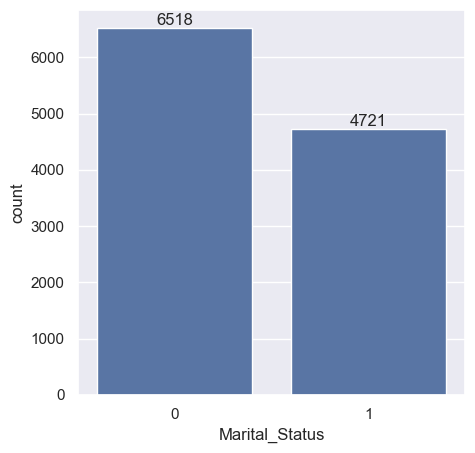

In [55]:
ax=sns.countplot(x="Marital_Status",data=df)
sns.set(rc={"figure.figsize":(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

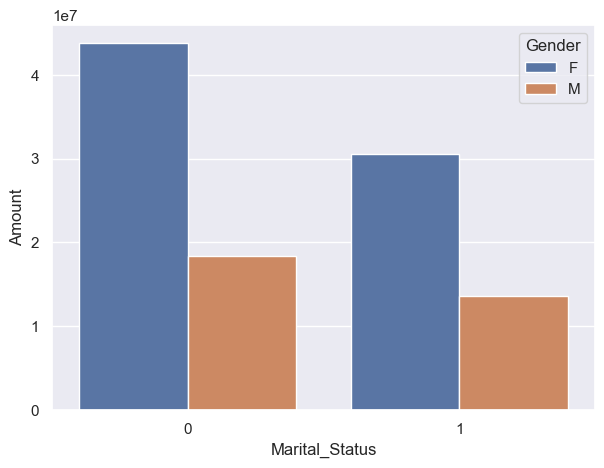

In [58]:
sales_state=df.groupby(['Marital_Status',"Gender"],as_index=False)["Amount"].sum()
sns.barplot(x='Marital_Status',y="Amount",data=sales_state,hue="Gender")

From the above graph we can conclude that most of the buyers are married women.

# Occupation 

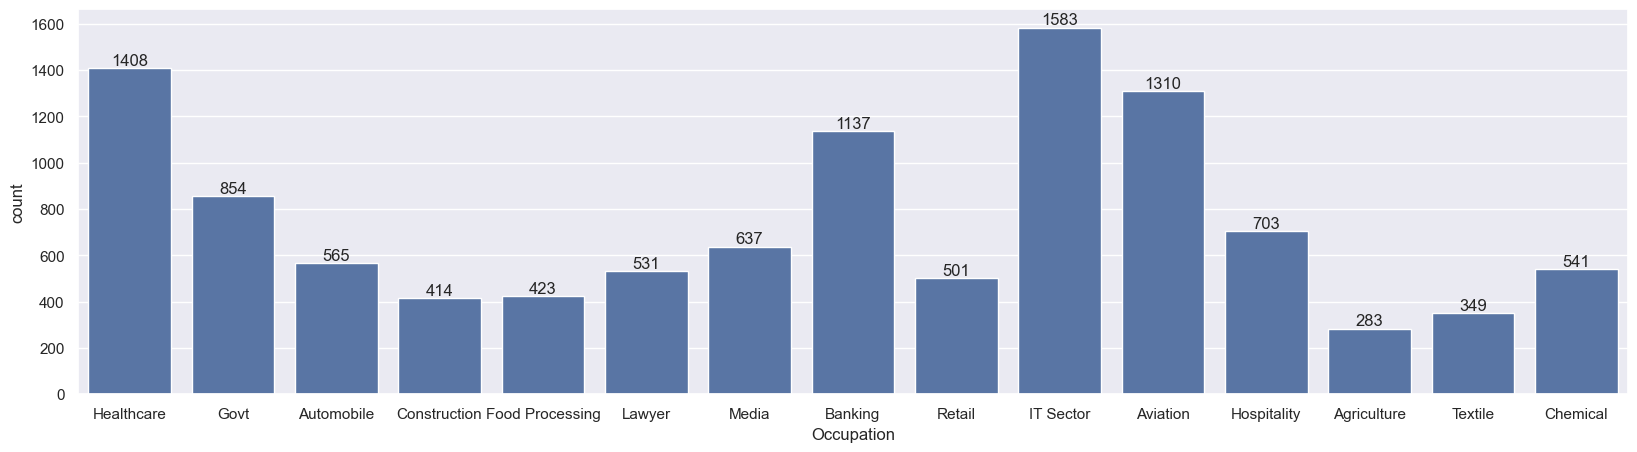

In [63]:
sns.set(rc={"figure.figsize":(20,5)})
ax=sns.countplot(x="Occupation",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [64]:
sales_state=df.groupby(["Occupation"], as_index= False)["Amount"].sum()

<Axes: xlabel='Occupation', ylabel='Amount'>

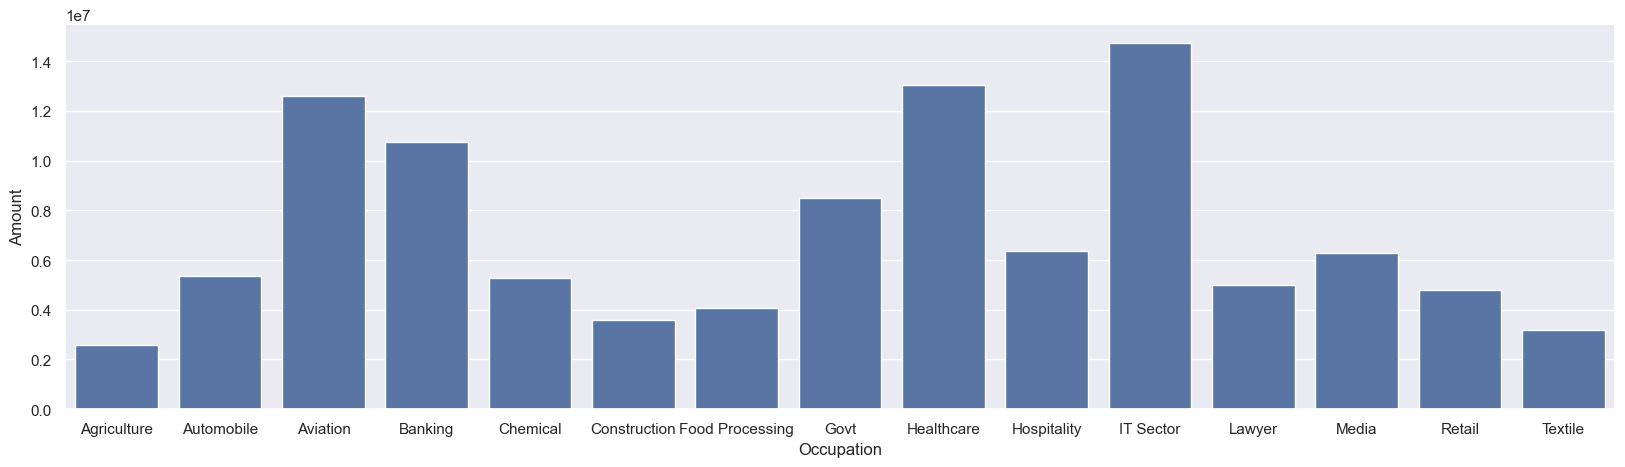

In [65]:
sns.barplot(data=sales_state,x="Occupation",y="Amount")

From the graph above we can conclude that most the buyers are from IT Sector.

# Product Category 

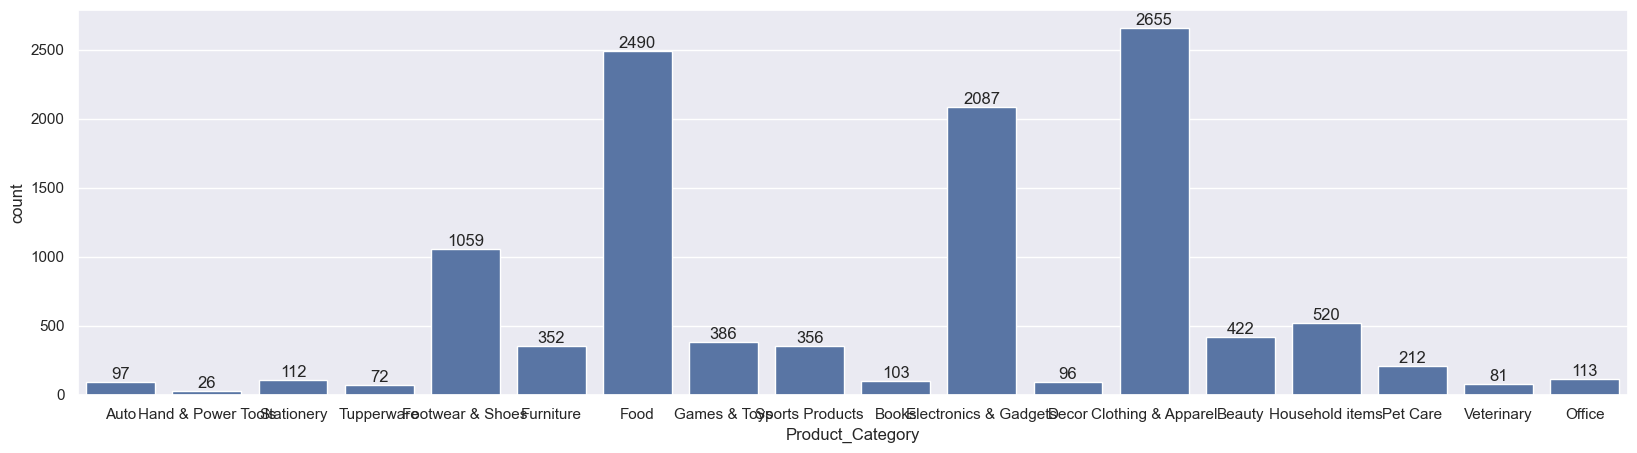

In [68]:
ax=sns.countplot(data=df,x="Product_Category")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

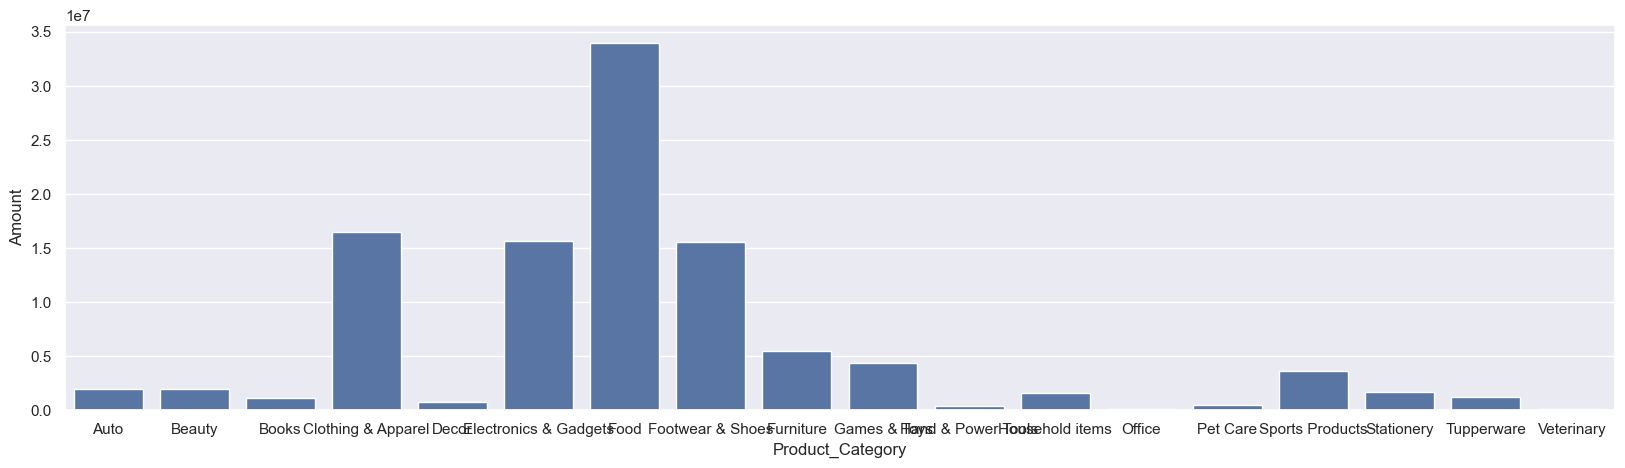

In [70]:
sales_state=df.groupby(['Product_Category'],as_index=False)["Amount"].sum()
sns.barplot(x="Product_Category",y="Amount",data=sales_state)

From the above graph we can conclude that most of the sold products are from Food Category.

<Axes: xlabel='Product_ID', ylabel='Orders'>

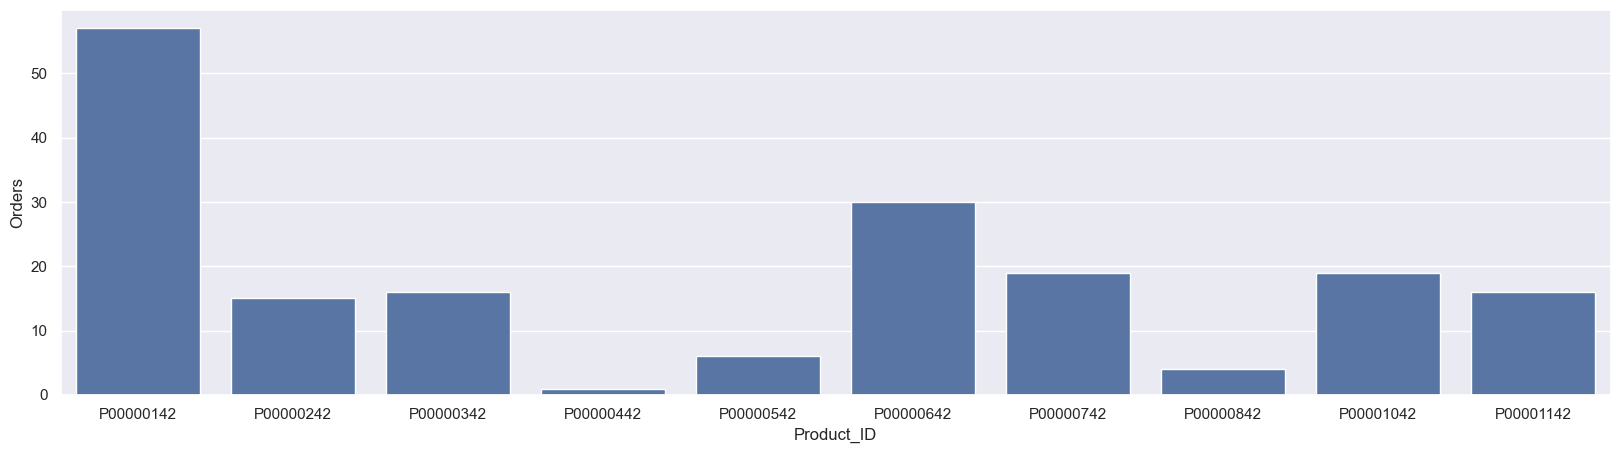

In [80]:
sales_state=df.groupby(["Product_ID"],as_index=False)['Orders'].sum().head(10)
sns.barplot(data=sales_state,x="Product_ID",y="Orders")

## Conclusion 

Married Women from the age group of 26-35 years mostly from Uttar Pradesh working in IT sector are more likely to buy prducts from the Food category 